### Tarea 3


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Regresión logística, clasificación y Metropolis-Hastings

> <ipython-input-60-5a9c6202d37e>(28)cost_func()
-> return
(Pdb) cross_entropy_res
-1470.6877719490808
(Pdb) cross_entropy_res
-1470.6877719490808
(Pdb) cross_entropy_res
-1470.6877719490808
(Pdb) quit


BdbQuit: 

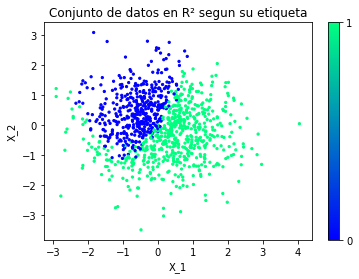

In [60]:
data = np.loadtxt('datosT3_.txt', delimiter=',')
x_input = np.array((data[0], data[1])).T
labels = np.array(data[2])

clase = list(map(lambda x: x == 1, labels))

plt.scatter(x_input[:,0], x_input[:,1], s=5, c=clase, cmap='winter')
plt.title(u"Conjunto de datos en R² segun su etiqueta")
plt.xlabel(u"X_1")
plt.ylabel(u"X_2")
plt.colorbar(ticks=[0, 1])

def cost_func(theta, x, y):    
    a_param = np.multiply(np.dot(x, theta), -1)
    sigmoid_res = np.reciprocal(np.add(np.exp(a_param), 1))
    
    cross_entropy_res = np.sum(
        np.add(
            np.multiply(
                y,
                np.log(sigmoid_res)), 
            np.multiply(
                np.subtract(1, y), 
                np.log(np.subtract(1, sigmoid_res)))))
    
    pdb.set_trace()
    
    return 
    
    
x_tilda = np.array((data[0], data[1], np.ones(len(labels)))).T
cost_func([1, 1, 1], x_tilda, 0)
    
True